<a href="https://www.kaggle.com/code/ahujajitesh63/notebook2ede75e0e7?scriptVersionId=163760511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

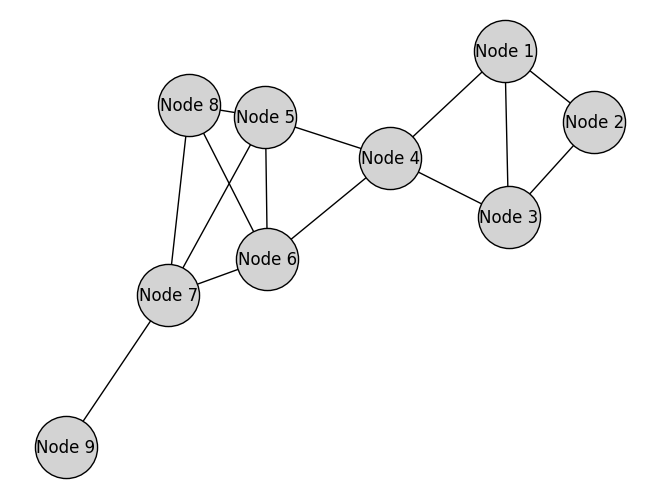

In [1]:
# Script to draw the network graph using networkx
import networkx as nx
import matplotlib.pyplot as plt
 
g = nx.Graph()
 
g.add_edge("Node 1", "Node 2")
g.add_edge("Node 1", "Node 3")
g.add_edge("Node 1", "Node 4")
g.add_edge("Node 2", "Node 3")
g.add_edge("Node 3", "Node 4")
g.add_edge("Node 4", "Node 5")
g.add_edge("Node 4", "Node 6")
g.add_edge("Node 5", "Node 6")
g.add_edge("Node 5", "Node 7")
g.add_edge("Node 5", "Node 8")
g.add_edge("Node 6", "Node 7")
g.add_edge("Node 6", "Node 8")
g.add_edge("Node 7", "Node 8")
g.add_edge("Node 7", "Node 9")
 
nx.draw(g, node_color="lightgray",node_size = 2000, edgecolors='black', with_labels=True)
plt.show()

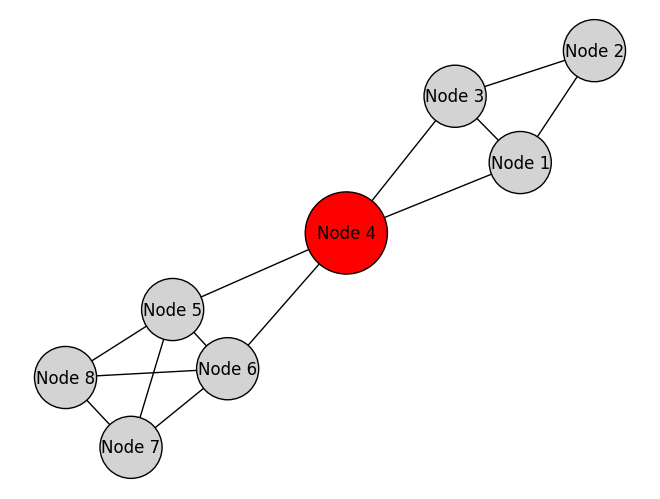

In [2]:
#Script to find neighbors of ego node at specified radius with networkx ego_graph function
ego = "Node 4"
hub_ego = nx.ego_graph(g, ego, radius=2, center=True, undirected=True)

color_map = []
size_map = []
for node in hub_ego:
    if node == ego:
        color_map.append('red')
        size_map.append(3500)
    else: 
        color_map.append('lightgray')
        size_map.append(2000)
        
# pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, node_color=color_map,node_size = size_map, edgecolors='black', with_labels=True)
plt.show()

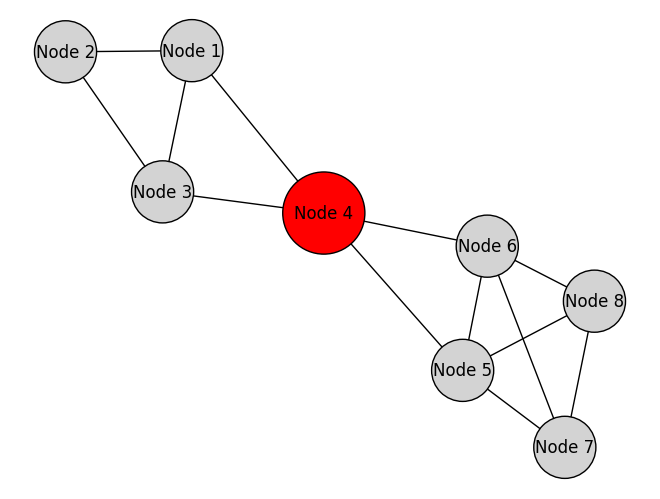

In [3]:
# script to get neighbours of a node at specified distance with networkx single_source_shortest_path_length function
neigbour_distance = 2
test_node_1 = "Node 4"
nodes_clique=nx.single_source_shortest_path_length(g, test_node_1, neigbour_distance)
nodes_to_keep = set(nodes_clique.keys())
g2 = g.subgraph(n for n in g.nodes() if n in nodes_to_keep)
# nx.draw(g2, with_labels=True)
color_map_0 = []
size_map_0 = []
for node in g2:
    if node == test_node_1  :
        color_map_0.append('red')
        size_map_0.append(3500)
    else: 
        color_map_0.append('lightgray')
        size_map_0.append(2000)
        
nx.draw(g2, node_color=color_map_0,node_size = size_map_0, edgecolors='black', with_labels=True)
plt.show()


Path from Node 1 to Node 7 goes through Node 2: ['Node 1', 'Node 2', 'Node 9', 'Node 7']
Path from Node 1 to Node 9 goes through Node 2: ['Node 1', 'Node 2', 'Node 9']
Path from Node 3 to Node 7 goes through Node 2: ['Node 3', 'Node 2', 'Node 9', 'Node 7']
Path from Node 3 to Node 9 goes through Node 2: ['Node 3', 'Node 2', 'Node 9']
Path from Node 7 to Node 1 goes through Node 2: ['Node 7', 'Node 9', 'Node 2', 'Node 1']
Path from Node 7 to Node 3 goes through Node 2: ['Node 7', 'Node 9', 'Node 2', 'Node 3']
Path from Node 9 to Node 1 goes through Node 2: ['Node 9', 'Node 2', 'Node 1']
Path from Node 9 to Node 3 goes through Node 2: ['Node 9', 'Node 2', 'Node 3']

Total path count of all shortest paths that through Node 2:is 8

Betweenness centrality of Node 2 (with the multiplication factor of 2) is: 6.333333333333333

		Updated network when Node 2 and Node 9 are connected


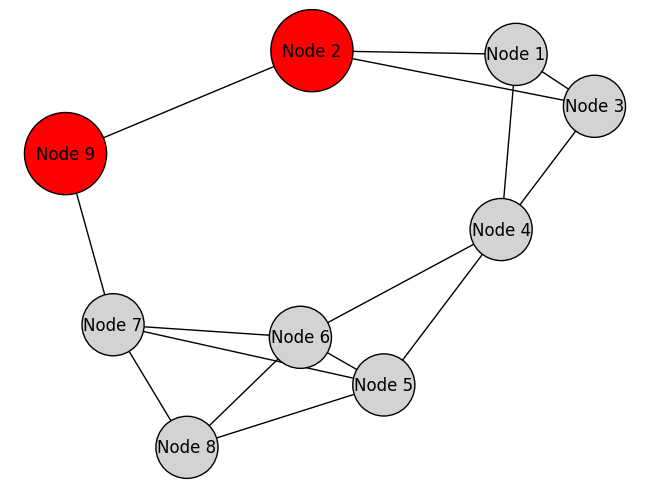

In [4]:
#Script to find the shortest paths passing through a particular node:
# 1) Iterates through every node pair and prints the shortest path if it passes through particular node
# 2) Prints the total count of all the shortest paths that passes through particular node
import networkx as nx


test_node = "Node 2" #Add any node to test here

# Add/remove node in the graph - optional
connection_node = "Node 9" #Add node to which test nodes is to be connected
g.add_edge(test_node, connection_node)
# g.remove_edge(test_node,connection_node) 

paths_through = []
path_count =0

#iterate all the node pairs to find all their shortest paths and print path if nodes passing through test node
for n1 in g.nodes():
    for n2 in g.nodes():
        if n1 != test_node and n2 != test_node: 
            path = nx.shortest_path(g, n1, n2)
            if test_node in path:   
                print(f"Path from {n1} to {n2} goes through {test_node}: {path}")
                paths_through.append(path)
                path_count = path_count+1
                
               
    
print(f"\nTotal path count of all shortest paths that through {test_node}:is {path_count}\n")
bet_cen = nx.betweenness_centrality(g, normalized=False)
print (f"Betweenness centrality of {test_node} (with the multiplication factor of 2) is: {2*bet_cen[test_node]}\n")
color_map_1 = []
size_map_1 = []
for node in g:
    if node == test_node or node == connection_node  :
        color_map_1.append('red')
        size_map_1.append(3500)
    else: 
        color_map_1.append('lightgray')
        size_map_1.append(2000)
        
nx.draw(g, node_color=color_map_1,node_size = size_map_1, edgecolors='black', with_labels=True)
print (f"\t\tUpdated network when {test_node} and {connection_node} are connected" )
plt.show()

g.remove_edge(test_node,connection_node) # remove the edge between test node and connection node after plotting their new graph for testing another node connections with test node


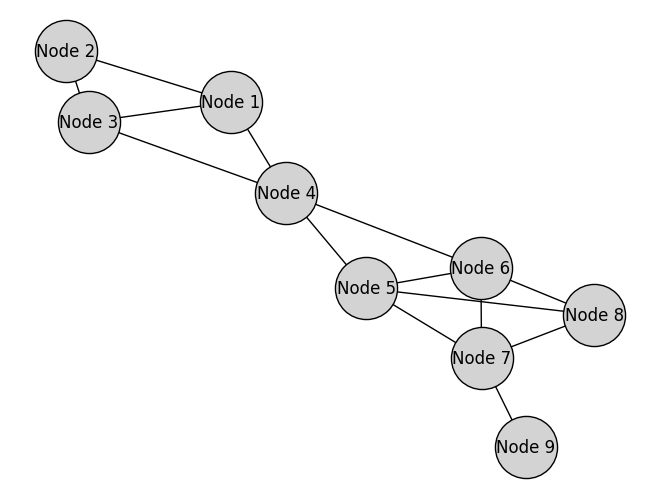

In [5]:
nx.draw(g, node_color="lightgray",node_size = 2000, edgecolors='black', with_labels=True)
plt.show()

In [6]:
# from networkx.algorithms.community import k_clique_communities
# # G3 = nx.complete_graph(5)
# K5 = nx.convert_node_labels_to_integers(g,first_label=0)
# g.add_edges_from(K5.edges())
# c = list(k_clique_communities(g, 4))
# sorted(list(c[0]))

# list(k_clique_communities(g, 2))

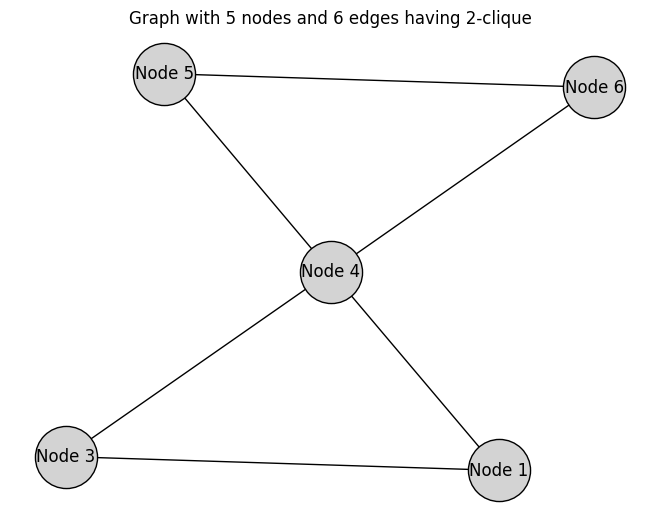

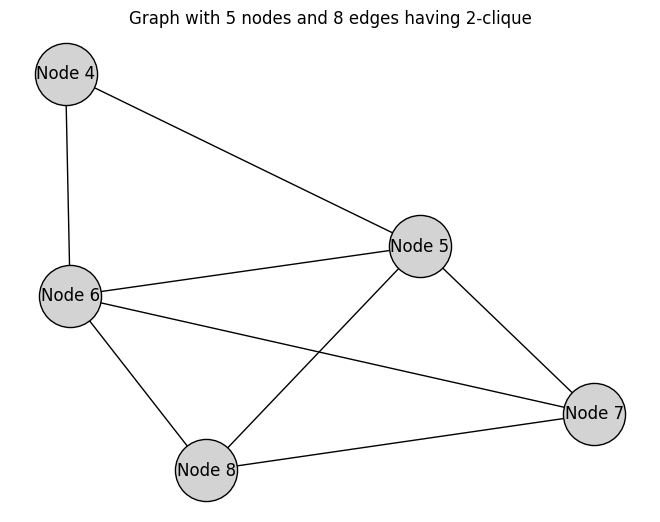

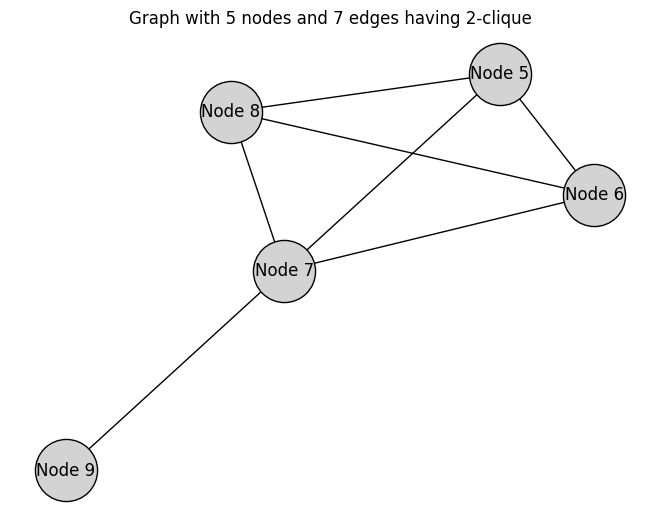

In [7]:
#Script to find k-clique of size  n
import networkx as nx
import itertools as itertools

def find_k_cliques(g, k, n):
    cliques = []
    nodes = list(g.nodes())
    for node_subset in itertools.combinations(nodes, n):
        subgraph = g.subgraph(node_subset)
        try:
            max_dist = max(nx.shortest_path_length(subgraph, source=u, target=v) for u, v in itertools.combinations(node_subset, 2))
            if max_dist <= k:
                cliques.append(subgraph)
        except nx.NetworkXNoPath:
            continue
    return cliques

import matplotlib.pyplot as plt

cliques = find_k_cliques(g, k=2, n=5)

for i, clique in enumerate(cliques):
    plt.figure(i)  # Create a new figure for each clique
    nx.draw(clique,node_color = "lightgray", node_size = 2000, edgecolors='black',  with_labels=True)
    plt.title(f"{clique} having 2-clique")

plt.show()


In [8]:
#script tp find adjacency matrix
A = nx.adjacency_matrix(g)
print(A.todense())

[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]
